In [2]:
import yfinance as yf
import pandas as pd
from pandas_datareader import data as pdr
import datetime as dt
import numpy as np
import matplotlib

In [3]:
endDate = dt.datetime.now()
startDate = endDate - dt.timedelta(days = 365*5)
endDate, startDate

(datetime.datetime(2024, 6, 1, 17, 27, 25, 897174),
 datetime.datetime(2019, 6, 3, 17, 27, 25, 897174))

In [4]:
stocks = ["SPY", "QQQ"]

df = yf.download(stocks, start = startDate, end = endDate)

print(df.head())

[*********************100%%**********************]  2 of 2 completed

Price        Adj Close                   Close                    High  \
Ticker             QQQ         SPY         QQQ         SPY         QQQ   
Date                                                                     
2019-06-03  164.692902  253.361786  170.119995  274.570007  173.949997   
2019-06-04  169.330093  258.861450  174.910004  280.529999  174.970001   
2019-06-05  170.588623  261.103699  176.210007  282.959991  176.610001   
2019-06-06  171.943939  262.801636  177.610001  284.799988  178.039993   
2019-06-07  175.264496  265.431488  181.039993  287.649994  181.770004   

Price                          Low                    Open              \
Ticker             SPY         QQQ         SPY         QQQ         SPY   
Date                                                                     
2019-06-03  276.549988  169.270004  273.089996  173.479996  275.309998   
2019-06-04  280.679993  171.369995  276.619995  172.029999  277.119995   
2019-06-05  282.989990  174.380005  2

In [5]:
adj_close_prices = df['Adj Close']
adj_close_prices.head()
print(adj_close_prices)

Ticker             QQQ         SPY
Date                              
2019-06-03  164.692902  253.361786
2019-06-04  169.330093  258.861450
2019-06-05  170.588623  261.103699
2019-06-06  171.943939  262.801636
2019-06-07  175.264496  265.431488
...                ...         ...
2024-05-24  457.950012  529.440002
2024-05-28  459.679993  529.809998
2024-05-29  456.440002  526.099976
2024-05-30  451.549988  522.609985
2024-05-31  450.709991  527.369995

[1259 rows x 2 columns]


In [6]:
log_returns = np.log(adj_close_prices/adj_close_prices.shift(1))
log_returns.head()
print(log_returns)

Ticker           QQQ       SPY
Date                          
2019-06-03       NaN       NaN
2019-06-04  0.027767  0.021475
2019-06-05  0.007405  0.008625
2019-06-06  0.007914  0.006482
2019-06-07  0.019128  0.009957
...              ...       ...
2024-05-24  0.009412  0.006595
2024-05-28  0.003771  0.000699
2024-05-29 -0.007073 -0.007027
2024-05-30 -0.010771 -0.006656
2024-05-31 -0.001862  0.009067

[1259 rows x 2 columns]


In [7]:
cumulative_log_returns = log_returns.cumsum()
print(cumulative_log_returns)


Ticker           QQQ       SPY
Date                          
2019-06-03       NaN       NaN
2019-06-04  0.027767  0.021475
2019-06-05  0.035172  0.030099
2019-06-06  0.043086  0.036581
2019-06-07  0.062214  0.046538
...              ...       ...
2024-05-24  1.022677  0.737001
2024-05-28  1.026448  0.737700
2024-05-29  1.019375  0.730673
2024-05-30  1.008604  0.724017
2024-05-31  1.006742  0.733084

[1259 rows x 2 columns]


<Axes: title={'center': 'Cumulatitive Returns'}, xlabel='Date'>

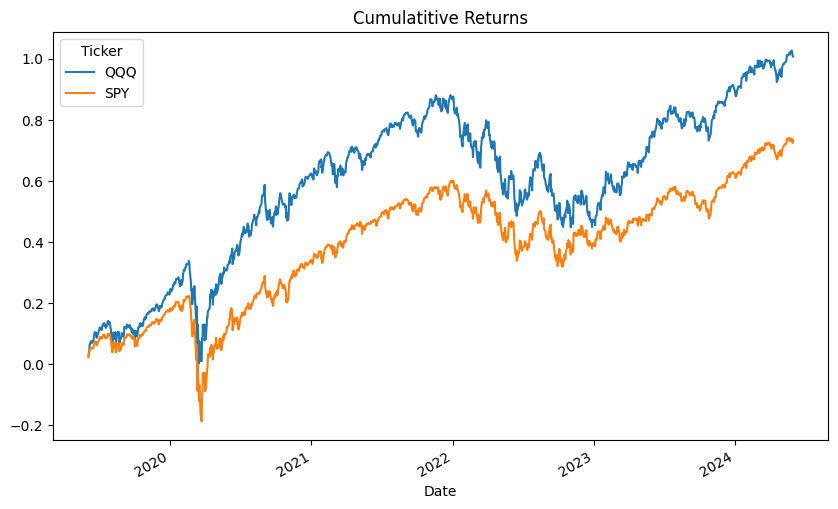

In [8]:
cumulative_log_returns.plot(title = "Cumulatitive Returns", figsize =(10,6))